In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import scipy

import pmana.utils

#### Sensitivity of PrMs

The $z$-score tells how many standard deviations a measured value $x$ is from the mean $\mu$:

$$
z = \frac{x-\mu}{\sigma}
$$

and we're testing whether the attenuation is exactly one, and whether we can measure it within its uncertainty (i.e., the null hypothesis is $A=1=\mu$):

$$
z = \frac{A-1}{\sigma_A}
$$

If we're able to measure a finite lifetime, an attenuation $A<1$ will be measured: we want to perform a one-sided $z$-test, e.g. at 90% confidence level, $z_\mathrm{crit.}(90\% \ \text{C.L.})=1.64$. 
Therefore:

$$
A\left(\frac{\sigma_A}{A}\right)z = A-1
$$
$$
A\left(1 - \left(\frac{\sigma_A}{A}\right)z\right) = 1
$$
$$
A = \left(1 - \left(\frac{\sigma_A}{A}\right)z\right)^{-1}
$$

in which $A\equiv\exp(\Delta t / \tau)$, and:

$$
\tau = \frac{\Delta t}{-\log\left(1 - \left(\frac{\sigma_A}{A}\right)z\right)} = \tau^\mathrm{max}(\Delta t, \sigma_A/A, z)
$$


About the error, we know from measurements and from electronics what is $\sigma_A$, with a constant component from the electronics.
From the paper, we see that the width of the IC-peak (after outer and inner anode scaling) is similar to that of the test pulse, so this means that $\sigma_V$ is indeed dominated by sucg component, and is roughly $\sigma_V \approx 0.9 \ \text{mV}$.
So we can evaluate the sensitivity as function of a flat $\sigma_A$:

$$
\tau = \frac{\Delta t}{\log\left(1 + \sigma_Az\right)} = \tau^\mathrm{max}(\Delta t, \sigma_A, z)
$$

**To do**:
...in which $A=\frac{V_S}{V_L}$ and $\sigma_A \approx \sqrt{2}\frac{\sigma_V}{V}$, **in the assumption of high purity**.
From the paper, we know that the peak was at roughly 850 mV, and the purity was roughly 1 ms (i.e., an attenuation of 12%), hence $V\approx 1 \ \text{V}$.
So, for reasonably high purities $\sigma_A \approx 0.00127$.

#### Modules and drift velocity modeling

In [3]:
# example
LS = 60   ###< mm
LL = 180  ###< mm
E = 0.5   ###< kV/cm

# drift velocity compilation, 89 K
Es = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2]
vds = 10 * numpy.array([0.0515, 0.0891, 0.1166, 0.1377, 0.1547, 0.1690, 0.1812, 0.1920, 0.2016, 0.2102, 0.2182, 0.2255])

vd_vs_E = scipy.interpolate.interp1d(Es, vds, kind='cubic', fill_value='extrapolate')

In [4]:
def compute_drift(
  LS,
  LL,
  vd = 1.6 ###< mm/μs
):

  return (LS - LL) / vd

In [5]:
def compute_drift_fromDelta(
  delta_L,
  vd = 1.6 ###< mm/μs 
):

  return delta_L / vd

In [6]:
def tau_max(
  delta_t,    ###< difference in drift time between the two monitors
  z = 1.64,   ###< z-test variable at 90% C.L.,
  syst = 0.02 ###< relative systematic uncertainty on the attenuation, sigma_A / A, at 1-2%
):

  return - delta_t / numpy.log(1 - z * syst)

def tau_max_sigmaA(
  delta_t,        ###< difference in drift time between the two monitors
  z = 1.64,       ###< z-test variable at 90% C.L.,
  syst = 0.00127  ###< relative systematic uncertainty on the attenuation, sigma_A, at 0.9 mV
):

  return delta_t / numpy.log(1 + z * syst)


#### Drift length

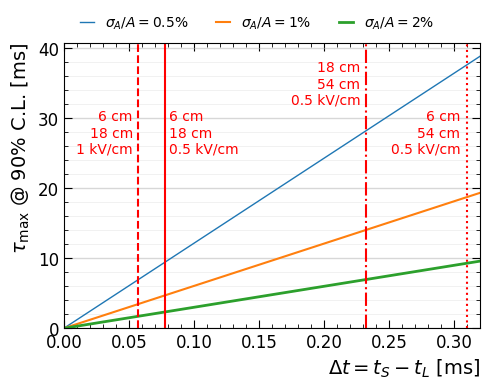

In [7]:
fig, ax = plt.subplots(figsize=(5, 4), layout='tight')

x = numpy.linspace(0, 0.32)
ax.plot(x, tau_max(x, 1.64, 0.005), lw=1, label='$\\sigma_A/A = 0.5$%')
ax.plot(x, tau_max(x, 1.64, 0.01), lw=1.5, label='$\\sigma_A/A = 1$%')
ax.plot(x, tau_max(x, 1.64, 0.02), lw=2, label='$\\sigma_A/A = 2$%')

# gfx
ax.set_xlim(0, 0.32)
ax.set_ylim(0, ax.get_ylim()[1])
pmana.utils.plotting.UpdateMatplotlibStyle(ax, '$\\Delta t = t_S - t_L$ [ms]', '$\\tau_{\\mathrm{max}}$ @ 90% C.L. [ms]')
ax.grid(alpha=0.5, which='major', axis='y', lw=1.)
ax.grid(alpha=0.25, which='minor', axis='y', lw=0.5)
ax.legend(ncol=3, handlelength=1, loc=(0.025, 1.02), fancybox=False, frameon=False)

# examples
ax.axvline(abs(compute_drift(60, 180, 1.547)/1e3), c='red', lw=1.5)
ax.text(0.081, 25, f'6 cm\n18 cm\n{0.5} kV/cm', horizontalalignment='left', color='red')
ax.axvline(abs(compute_drift(60, 180, 2.1)/1e3), c='red', lw=1.5, ls='--')
ax.text(0.053, 25, f'6 cm\n18 cm\n{1} kV/cm', horizontalalignment='right', color='red')

ax.axvline(abs(compute_drift(60, 540, 1.547)/1e3), c='red', ls=':', lw=1.5)
ax.text(0.305, 25, f'6 cm\n54 cm\n{0.5} kV/cm', horizontalalignment='right', color='red')

ax.axvline(abs(compute_drift(180, 540, 1.547)/1e3), c='red', ls='-.', lw=1.5)
ax.text(0.228, 32, f'18 cm\n54 cm\n{0.5} kV/cm', horizontalalignment='right', color='red')

plt.show()
fig.savefig(f"../plots/Sensitivity_DriftLength.png", dpi=300, bbox_inches='tight')

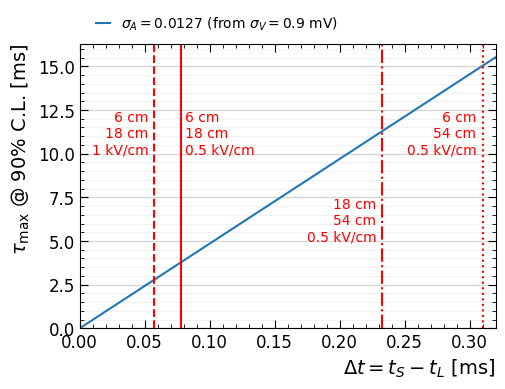

In [22]:
fig, ax = plt.subplots(figsize=(5, 4), layout='tight')

x = numpy.linspace(0, 0.32)
ax.plot(x, tau_max_sigmaA(x, 1.64, 0.0127), lw=1.5, label='$\\sigma_A = 0.0127$ (from $\\sigma_V = 0.9$ mV)')
# ax.plot(x, tau_max_sigmaA(x, 1.64, 0.9), lw=1.5, label='$\\sigma_A = 0.0127$ (from $\\sigma_V = 0.9$ mV)')

# gfx
ax.set_xlim(0, 0.32)
ax.set_ylim(0, ax.get_ylim()[1])
pmana.utils.plotting.UpdateMatplotlibStyle(ax, '$\\Delta t = t_S - t_L$ [ms]', '$\\tau_{\\mathrm{max}}$ @ 90% C.L. [ms]')
ax.grid(alpha=0.5, which='major', axis='y', lw=1.)
ax.grid(alpha=0.25, which='minor', axis='y', lw=0.5)
ax.legend(ncol=3, handlelength=1, loc=(0.025, 1.02), fancybox=False, frameon=False)

# examples
ax.axvline(abs(compute_drift(60, 180, 1.547)/1e3), c='red', lw=1.5)
ax.text(0.081, 10, f'6 cm\n18 cm\n{0.5} kV/cm', horizontalalignment='left', color='red')
ax.axvline(abs(compute_drift(60, 180, 2.1)/1e3), c='red', lw=1.5, ls='--')
ax.text(0.053, 10, f'6 cm\n18 cm\n{1} kV/cm', horizontalalignment='right', color='red')

ax.axvline(abs(compute_drift(60, 540, 1.547)/1e3), c='red', ls=':', lw=1.5)
ax.text(0.305, 10, f'6 cm\n54 cm\n{0.5} kV/cm', horizontalalignment='right', color='red')

ax.axvline(abs(compute_drift(180, 540, 1.547)/1e3), c='red', ls='-.', lw=1.5)
ax.text(0.228, 5, f'18 cm\n54 cm\n{0.5} kV/cm', horizontalalignment='right', color='red')

plt.show()
fig.savefig(f"../plots/Sensitivity_DriftLength_SigmaA.png", dpi=300, bbox_inches='tight')

#### Drift field

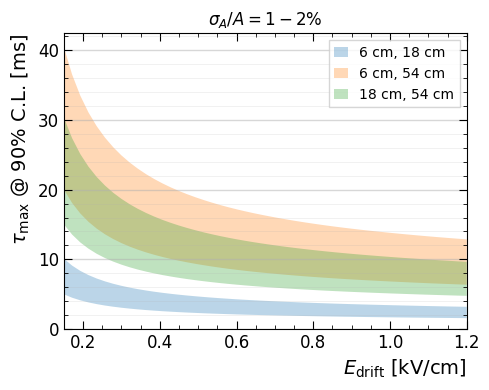

In [380]:
fig, ax = plt.subplots(figsize=(5, 4), layout='tight')

x = numpy.linspace(0.15, 1.2) ###< E_drift [kV/cm]
ax.fill_between(
    x,
    tau_max(-compute_drift(60, 180, vd_vs_E(x))/1000, 1.64, 0.01),
    tau_max(-compute_drift(60, 180, vd_vs_E(x))/1000, 1.64, 0.02),
    alpha=0.3,
    label='6 cm, 18 cm'
)
ax.fill_between(
    x,
    tau_max(-compute_drift(60, 540, vd_vs_E(x))/1000, 1.64, 0.01),
    tau_max(-compute_drift(60, 540, vd_vs_E(x))/1000, 1.64, 0.02),
    alpha=0.3,
    #hatch='\\\\\\',
    #ec='C1',
    label='6 cm, 54 cm'
)
ax.fill_between(
    x,
    tau_max(-compute_drift(180, 540, vd_vs_E(x))/1000, 1.64, 0.01),
    tau_max(-compute_drift(180, 540, vd_vs_E(x))/1000, 1.64, 0.02),
    alpha=0.3,
    #hatch='///',
    #ec='C2',
    label='18 cm, 54 cm'
)

# gfx
ax.set_xlim(0.15, 1.2)
ax.set_ylim(0, ax.get_ylim()[1])
pmana.utils.plotting.UpdateMatplotlibStyle(ax, '$E_{\\mathrm{drift}}$ [kV/cm]', '$\\tau_{\\mathrm{max}}$ @ 90% C.L. [ms]')
ax.set_title(r'$\sigma_A/A = 1-2\%$')
ax.grid(alpha=0.5, which='major', axis='y', lw=1.)
ax.grid(alpha=0.25, which='minor', axis='y', lw=0.5)

plt.show()
fig.savefig(f"../plots/Sensitivity_DriftField.png", dpi=300, bbox_inches='tight')

#### Bringing it all together

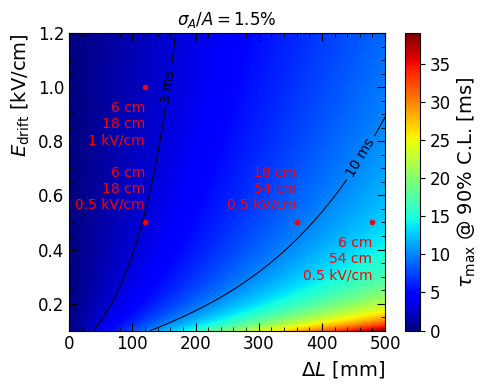

In [379]:
fig, ax = plt.subplots(figsize=(5, 4), layout='tight')

x = numpy.linspace(0, 500, 5000)    ###< delta drift
y = numpy.linspace(0.1, 1.2, 5000) ###< E_drift [kV/cm]
X, Y = numpy.meshgrid(x, y)
Z = tau_max(compute_drift_fromDelta(X, vd_vs_E(Y))/1000, 1.64, 0.015)

c = ax.pcolormesh(X, Y, Z, cmap='jet')
cb = fig.colorbar(c, ax=ax)
cb.set_label('$\\tau_{\\mathrm{max}}$ @ 90% C.L. [ms]', fontsize=14)  # label fontsize
cb.ax.tick_params(labelsize=12) 

# gfx
ax.set_xlabel('$\\Delta L$ [mm]', fontsize=14, loc='right')
ax.set_ylabel('$E_{\\mathrm{drift}}$ [kV/cm]', fontsize=14, loc='top')
ax.minorticks_on()
ax.tick_params(which='major', length=6, direction='in', labelsize=12, right=True, top=True)
ax.tick_params(which='minor', length=3, direction='in', right=True, top=True)
ax.set_title(r'$\sigma_A/A = 1.5 \%$')

# contour
contour = ax.contour(X, Y, Z, levels=[3, 10], colors='black', linewidths=0.75)
ax.clabel(contour, fmt='%1.0f ms', inline=True, fontsize=10)

# examples
ax.scatter(180-60, 0.5, c='red', marker='.')
ax.text(180-60, 0.55, f'6 cm\n18 cm\n{0.5} kV/cm', horizontalalignment='right', color='red')
ax.scatter(180-60, 1, c='red', marker='.')
ax.text(180-60, 0.95, f'6 cm\n18 cm\n{1} kV/cm', verticalalignment='top', horizontalalignment='right', color='red')
ax.scatter(540-60, 0.5, c='red', marker='.')
ax.text(540-60, 0.45, f'6 cm\n54 cm\n{0.5} kV/cm', verticalalignment='top', horizontalalignment='right', color='red')
ax.scatter(540-180, 0.5, c='red', marker='.')
ax.text(540-180, 0.55, f'18 cm\n54 cm\n{0.5} kV/cm', horizontalalignment='right', color='red')

plt.show()
fig.savefig(f"../plots/Sensitivity_DriftField_DriftLength.png", dpi=300, bbox_inches='tight')

#### Backup

and this gives the sensitivity in the edge case where we're dominated by the 'statistics', e.g. by variations of the temperature.

About the error, we know from measurements and from electronics what is $\sigma_A$, which has a constant component from the electronics and one intrinsic component.
From the paper, we see that the width of the IC-peak (after outer and inner anode scaling) is similar to that of the test pulse, so this means that $\sigma_V$ is dominated by the electronics component and is roughly $\sigma_V \approx 0.9 \ \text{mV}$.
So we can evaluate the sensitivity as function of a flat $\sigma_A$:

$$
\tau = \frac{\Delta t}{\log\left(1 + \sigma_Az\right)} = \tau^\mathrm{max}(\Delta t, \sigma_A, z)
$$

in which $A=\frac{V_S}{V_L}$ and $\sigma_A \approx \sqrt{2}\frac{\sigma_V}{V}$, **in the assumption of high purity**.
From the paper, we know that the peak was at roughly 850 mV, and the purity was roughly 1 ms (i.e., an attenuation of 12%), hence $V\approx 1 \ \text{V}$.
So, for reasonably high purities $\sigma_A \approx 0.00127$.